In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [3]:
df = pd.read_csv('../merged_data/brfss_combine_cleaned.csv')

In [4]:
def convert_IDATE(x):
    return x[:4] + x[5:7]

In [5]:
df.shape

(399854, 301)

In [6]:
df.columns

Index(['Unnamed: 0', 'IDATE', 'CNCRAGE_N', 'CNCRAGE_C', 'PHYSHLTH_N',
       'PHYSHLTH_C', 'FEETCHK_N', 'FEETCHK_C', 'MAXDRNKS_N', 'MAXDRNKS_C',
       ...
       'CSRVCTL2', 'ACETOUCH', 'TRETHEPC', '_RACEG21', '_RFSEAT2', 'PVTRESD3',
       'HADHYST2', 'PDIABTST', 'CRGVALZD', 'HAVECFS'],
      dtype='object', length=301)

In [7]:
df = df.drop(columns=['Unnamed: 0', 'IDATE'])
# df['IDATE'] = df['IDATE'].apply(convert_IDATE).astype(int)

In [8]:
target = 'ADDEPEV3'

In [9]:
df = df.sample(frac=1, random_state=42)
X = df.drop(columns=[target])
y = df[target]

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(max_depth=30, min_samples_leaf=10)
clf.fit(X, y)

In [12]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [10, 15, 20, 25, 30], 'min_samples_leaf': [5, 10, 15, 20, 25, 30]}
clf = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid=parameters,
                   scoring='accuracy',
                   return_train_score=True,
                   n_jobs=16)
clf.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=16,
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30]},
             return_train_score=True, scoring='accuracy')

In [13]:
print(clf.best_estimator_)
print(accuracy_score(y_val, clf.best_estimator_.predict(X_val)))

DecisionTreeClassifier(max_depth=10, min_samples_leaf=30)
0.8519231731105887


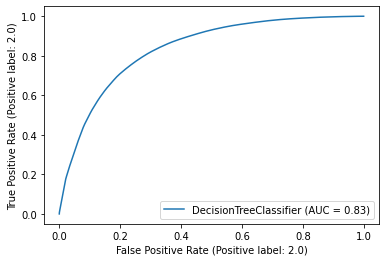

In [14]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf.best_estimator_, X, y)

In [15]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [10, 15, 20, 25, 30], 'min_samples_leaf': [5, 10, 15, 20, 25, 30]}
clf_recall = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid=parameters,
                   scoring='recall',
                   return_train_score=True,
                   n_jobs=16)
clf_recall.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=16,
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30]},
             return_train_score=True, scoring='recall')

In [16]:
print(clf_recall.best_estimator_)
print(accuracy_score(y_val, clf_recall.best_estimator_.predict(X_val)))

DecisionTreeClassifier(max_depth=30, min_samples_leaf=5)
0.9251488020807282


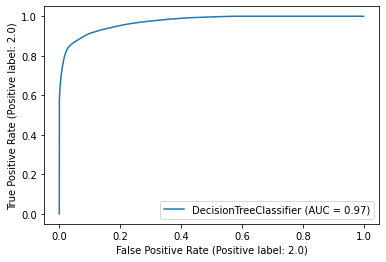

In [17]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf_recall.best_estimator_, X, y)

In [18]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [10, 15, 20, 25, 30], 'min_samples_leaf': [5, 10, 15, 20, 25, 30]}
clf_f1 = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid=parameters,
                   scoring='f1',
                   return_train_score=True,
                   n_jobs=16)
clf_f1.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=16,
             param_grid={'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30]},
             return_train_score=True, scoring='f1')

In [19]:
print(clf_f1.best_estimator_)
print(accuracy_score(y_val, clf_f1.best_estimator_.predict(X_val)))

DecisionTreeClassifier(max_depth=30, min_samples_leaf=25)
0.8681288450957835


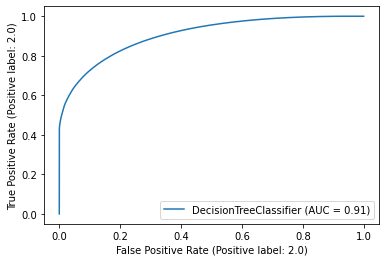

In [20]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf_f1.best_estimator_, X, y)

In [21]:
import joblib

# Save the pretrained model
joblib.dump(clf, 'DST_acc_gridsearch.pkl')
joblib.dump(clf_recall, 'DST_recall_gridsearch.pkl')
joblib.dump(clf_f1, 'DST_f1_gridsearch.pkl')

['DST_f1_gridsearch.pkl']